# Local Outlier Factor

Computes the local density deviation of a given data point with respect to its neighbors.

In [158]:
# Imports
import sys
import numpy as np

sys.path.append("../../")
from sklearn.metrics import roc_curve, confusion_matrix
from model.predict import *
from model.helpers import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

In [159]:
# load data
TRAIN = {}
TEST = {}
VALIDATION = {}

path = "../../../data/master/"
train = "train_"
test = "test_"
validation = "validation_"
#  list of scenarios
scenarios = [
    "CVE-2012-2122",
    "CVE-2014-0160",
    "CVE-2017-7529",
    "CVE-2017-12635_6",
    "CVE-2018-3760",
    "CVE-2019-5418",
    "CVE-2020-9484",
    "CVE-2020-13942",
    "CVE-2020-23839",
    "CWE-89-SQL-injection",
]

for i in range(0, len(scenarios)):
    TRAIN[scenarios[i]] = pd.read_pickle(path + "/" + train + scenarios[i] + ".pkl")
    TEST[scenarios[i]] = pd.read_pickle(path + "/" + test + scenarios[i] + ".pkl")
    VALIDATION[scenarios[i]] = pd.read_pickle(
        path + "/" + validation + scenarios[i] + ".pkl"
    )

In [160]:
# scale data
for i in range(0, len(scenarios)):
    TRAIN[scenarios[i]] = scale(df=TRAIN[scenarios[i]], method="standard")
    TEST[scenarios[i]] = scale(df=TEST[scenarios[i]], method="standard")
    VALIDATION[scenarios[i]] = scale(df=VALIDATION[scenarios[i]], method="standard")

In [161]:
models = {}
for i in range(0, len(scenarios)):
    models[scenarios[i]] = load_model(
        model_type="LocalOutlierFactor",
        train_data=TRAIN,
        test_data=TEST,
        scenario=scenarios[i],
        contamination_rate=False,
    )

In [162]:
# get preditions
results = {}
for i in range(0, len(scenarios)):
    _, _, results[scenarios[i]] = predict_(
        models[scenarios[i]],
        model_type="LocalOutlierFactor",
        data=TEST,
        scenario=scenarios[i],
    )

#### CVE-2012-2122

In [163]:
## remember -1 outliers, 1 inliners
print(results["CVE-2012-2122"]["LocalOutlierFactor_predictions"].value_counts())

0    110196
1     19084
Name: LocalOutlierFactor_predictions, dtype: int64


#### CVE-2014-0160

In [164]:
print(results["CVE-2014-0160"]["LocalOutlierFactor_predictions"].value_counts())

0    26071
1    10912
Name: LocalOutlierFactor_predictions, dtype: int64


#### CVE-2017-7529

In [165]:
print(results["CVE-2017-7529"]["LocalOutlierFactor_predictions"].value_counts())

1    32602
0     2628
Name: LocalOutlierFactor_predictions, dtype: int64


#### CVE-2017-12635_6

In [166]:
print(results["CVE-2017-12635_6"]["LocalOutlierFactor_predictions"].value_counts())

0    33279
1     4127
Name: LocalOutlierFactor_predictions, dtype: int64


#### CVE-2018-3760

In [167]:
print(results["CVE-2018-3760"]["LocalOutlierFactor_predictions"].value_counts())

0    24396
1    11325
Name: LocalOutlierFactor_predictions, dtype: int64


#### CVE-2019-5418

In [168]:
print(results["CVE-2019-5418"]["LocalOutlierFactor_predictions"].value_counts())

0    26984
1    10279
Name: LocalOutlierFactor_predictions, dtype: int64


#### CVE-2020-9484

In [169]:
print(results["CVE-2020-9484"]["LocalOutlierFactor_predictions"].value_counts())

0    29390
1     8463
Name: LocalOutlierFactor_predictions, dtype: int64


#### CVE-2020-13942

In [170]:
## remember -1 outliers, 1 inliners
print(results["CVE-2020-13942"]["LocalOutlierFactor_predictions"].value_counts())

0    30709
1     6088
Name: LocalOutlierFactor_predictions, dtype: int64


#### CVE-2020-23839

In [171]:
print(results["CVE-2020-23839"]["LocalOutlierFactor_predictions"].value_counts())

0    32584
1     7343
Name: LocalOutlierFactor_predictions, dtype: int64


#### CWE-89-SQL-injection

In [172]:
print(results["CWE-89-SQL-injection"]["LocalOutlierFactor_predictions"].value_counts())

0    31156
1     7460
Name: LocalOutlierFactor_predictions, dtype: int64


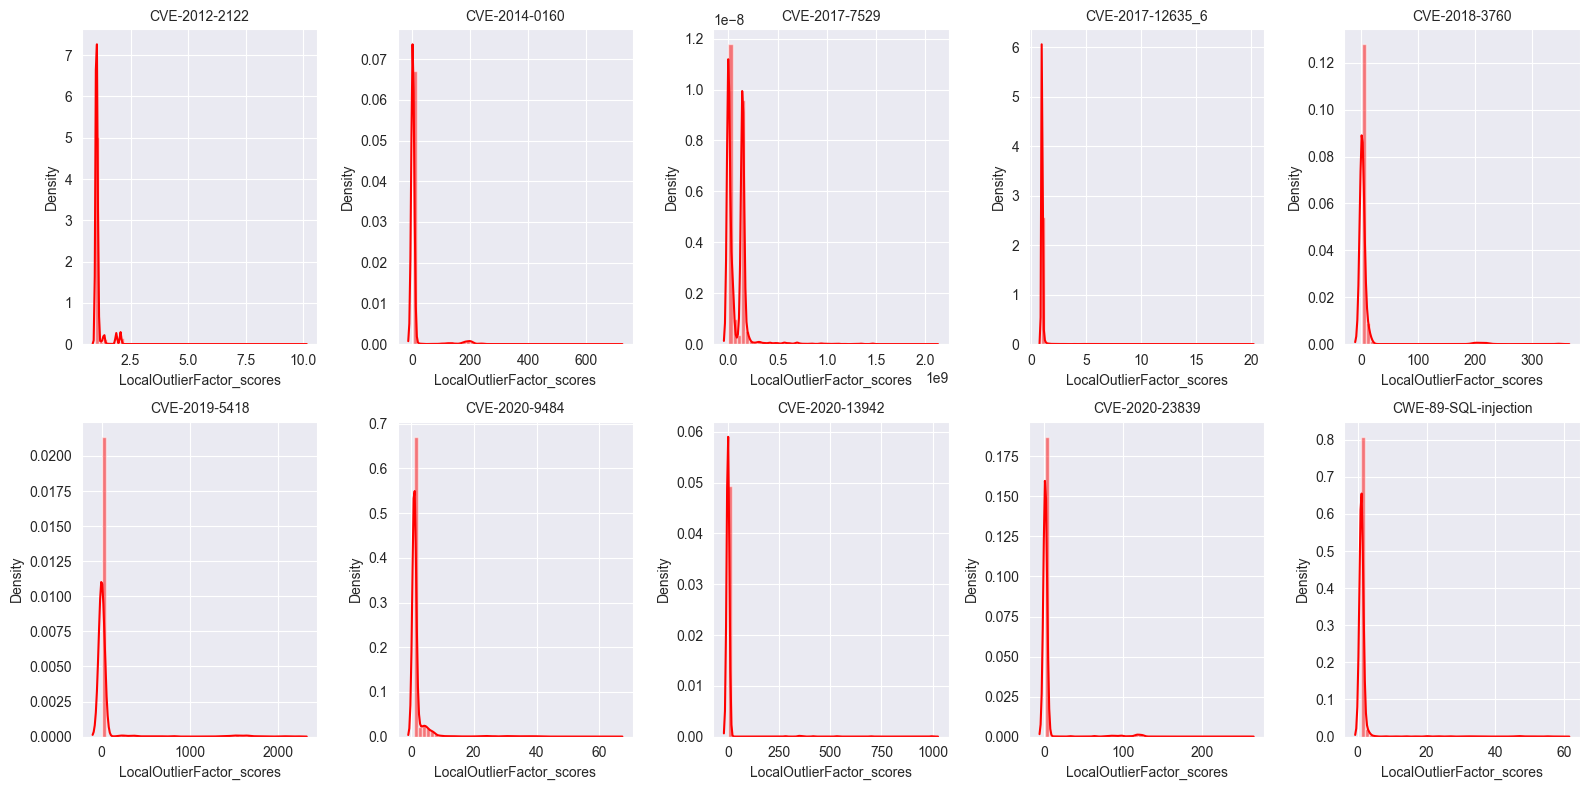

In [173]:
# Scores represent the shifted opposite of the Local Outlier Factor of X.
# Bigger is better, i.e. large values correspond to inliers.

# Distribution of Scores in each scenario
fig, axes = plt.subplots(2, 5, sharex=False, figsize=(16, 8))
sns.distplot(
    results["CVE-2012-2122"]["LocalOutlierFactor_scores"],
    color="red",
    label="if",
    hist_kws={"alpha": 0.5},
    ax=axes[0, 0],
)
axes[0, 0].set_title("CVE-2012-2122", fontsize=10, loc="center")

sns.distplot(
    results["CVE-2014-0160"]["LocalOutlierFactor_scores"],
    color="red",
    label="if",
    hist_kws={"alpha": 0.5},
    ax=axes[0, 1],
)
axes[0, 1].set_title("CVE-2014-0160", fontsize=10, loc="center")

sns.distplot(
    results["CVE-2017-7529"]["LocalOutlierFactor_scores"],
    color="red",
    label="if",
    hist_kws={"alpha": 0.5},
    ax=axes[0, 2],
)
axes[0, 2].set_title("CVE-2017-7529", fontsize=10, loc="center")

sns.distplot(
    results["CVE-2017-12635_6"]["LocalOutlierFactor_scores"],
    color="red",
    label="if",
    hist_kws={"alpha": 0.5},
    ax=axes[0, 3],
)
axes[0, 3].set_title("CVE-2017-12635_6", fontsize=10, loc="center")

sns.distplot(
    results["CVE-2018-3760"]["LocalOutlierFactor_scores"],
    color="red",
    label="if",
    hist_kws={"alpha": 0.5},
    ax=axes[0, 4],
)
axes[0, 4].set_title("CVE-2018-3760", fontsize=10, loc="center")

sns.distplot(
    results["CVE-2019-5418"]["LocalOutlierFactor_scores"],
    color="red",
    label="if",
    hist_kws={"alpha": 0.5},
    ax=axes[1, 0],
)
axes[1, 0].set_title("CVE-2019-5418", fontsize=10, loc="center")

sns.distplot(
    results["CVE-2020-9484"]["LocalOutlierFactor_scores"],
    color="red",
    label="if",
    hist_kws={"alpha": 0.5},
    ax=axes[1, 1],
)
axes[1, 1].set_title("CVE-2020-9484", fontsize=10, loc="center")

sns.distplot(
    results["CVE-2020-13942"]["LocalOutlierFactor_scores"],
    color="red",
    label="if",
    hist_kws={"alpha": 0.5},
    ax=axes[1, 2],
)
axes[1, 2].set_title("CVE-2020-13942", fontsize=10, loc="center")

sns.distplot(
    results["CVE-2020-23839"]["LocalOutlierFactor_scores"],
    color="red",
    label="if",
    hist_kws={"alpha": 0.5},
    ax=axes[1, 3],
)
axes[1, 3].set_title("CVE-2020-23839", fontsize=10, loc="center")

sns.distplot(
    results["CWE-89-SQL-injection"]["LocalOutlierFactor_scores"],
    color="red",
    label="if",
    hist_kws={"alpha": 0.5},
    ax=axes[1, 4],
)
axes[1, 4].set_title("CWE-89-SQL-injection", fontsize=10, loc="center")
fig.tight_layout()
plt.show()
fig.savefig("../../../src/plots/models/LOF_Scoresdisplot.png")

### Confusion Matrices

In [174]:
# get true values to evaluate algorithm
y_true = {}
for i in range(0, len(scenarios)):
    y_true[scenarios[i]] = encode(TEST[scenarios[i]])[
        "exploit"
    ]  # remember 0 = inliners, 1 = outliers
    # encode to fit Isolation Forest predicitons

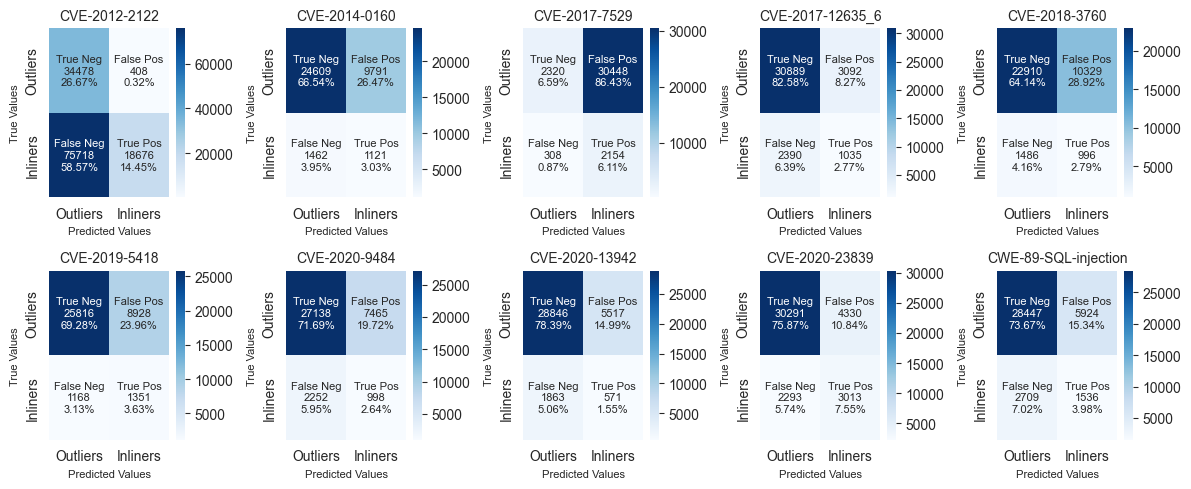

In [175]:
# True Negative: Top Left
# False Postive: Top Right
# False Negative: Bottom Left
# True Positive: Bottom Right

# Confusion Matrices
cms = {}
for key in results.keys():
    C = confusion_matrix(
        y_true=y_true[key], y_pred=results[key]["LocalOutlierFactor_predictions"]
    )
    # dictionary with scenario name as key and confusion matrix as value
    dict_ = {key: C}
    cms.update(dict_)

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
# CVE-2012-2122
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2012-2122"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2012-2122"].flatten() / np.sum(cms["CVE-2012-2122"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(
    cms["CVE-2012-2122"],
    annot=labels,
    annot_kws={"fontsize": 8},
    fmt="2",
    cmap="Blues",
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 0],
)
axes[0, 0].set_title("CVE-2012-2122", size=10)
axes[0, 0].set_xlabel("Predicted Values", size=8)
axes[0, 0].set_ylabel("True Values", size=8)

# CVE-2014-0160
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2014-0160"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2014-0160"].flatten() / np.sum(cms["CVE-2014-0160"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2014-0160"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 1],
)
axes[0, 1].set_title("CVE-2014-0160", size=10)
axes[0, 1].set_xlabel("Predicted Values", size=8)
axes[0, 1].set_ylabel("True Values", size=8)


# CVE-2017-7529
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2017-7529"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2017-7529"].flatten() / np.sum(cms["CVE-2017-7529"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2017-7529"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 2],
)
axes[0, 2].set_title("CVE-2017-7529", size=10)
axes[0, 2].set_xlabel("Predicted Values", size=8)
axes[0, 2].set_ylabel("True Values", size=8)


# CVE-2017-12635_6
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2017-12635_6"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2017-12635_6"].flatten() / np.sum(cms["CVE-2017-12635_6"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2017-12635_6"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 3],
)
axes[0, 3].set_title("CVE-2017-12635_6", size=10)
axes[0, 3].set_xlabel("Predicted Values", size=8)
axes[0, 3].set_ylabel("True Values", size=8)


# CVE-2018-3760
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2018-3760"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2018-3760"].flatten() / np.sum(cms["CVE-2018-3760"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2018-3760"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 4],
)
axes[0, 4].set_title("CVE-2018-3760", size=10)
axes[0, 4].set_xlabel("Predicted Values", size=8)
axes[0, 4].set_ylabel("True Values", size=8)


# CVE-2019-5418
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2019-5418"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2019-5418"].flatten() / np.sum(cms["CVE-2019-5418"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2019-5418"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 0],
)
axes[1, 0].set_title("CVE-2019-5418", size=10)
axes[1, 0].set_xlabel("Predicted Values", size=8)
axes[1, 0].set_ylabel("True Values", size=8)

# CVE-2020-9484
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2020-9484"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2020-9484"].flatten() / np.sum(cms["CVE-2020-9484"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2020-9484"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 1],
)
axes[1, 1].set_title("CVE-2020-9484", size=10)
axes[1, 1].set_xlabel("Predicted Values", size=8)
axes[1, 1].set_ylabel("True Values", size=8)


# CVE-2020-13942
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2020-13942"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2020-13942"].flatten() / np.sum(cms["CVE-2020-13942"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2020-13942"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 2],
)
axes[1, 2].set_title("CVE-2020-13942", size=10)
axes[1, 2].set_xlabel("Predicted Values", size=8)
axes[1, 2].set_ylabel("True Values", size=8)


# CVE-2020-23839
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2020-23839"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2020-23839"].flatten() / np.sum(cms["CVE-2020-23839"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2020-23839"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 3],
)
axes[1, 3].set_title("CVE-2020-23839", size=10)
axes[1, 3].set_xlabel("Predicted Values", size=8)
axes[1, 3].set_ylabel("True Values", size=8)


# CWE-89-SQL-injection
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = [
    "{0:0.0f}".format(value) for value in cms["CWE-89-SQL-injection"].flatten()
]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CWE-89-SQL-injection"].flatten()
    / np.sum(cms["CWE-89-SQL-injection"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CWE-89-SQL-injection"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 4],
)
axes[1, 4].set_title("CWE-89-SQL-injection", size=10)
axes[1, 4].set_xlabel("Predicted Values", size=8)
axes[1, 4].set_ylabel("True Values", size=8)


fig.tight_layout()
plt.show()
fig.savefig("../../../src/plots/models/LOF_ConfusionMatrix_testdata.png")

In [176]:
# get rates to evaluate the results
pd.options.display.float_format = "{:.2f}".format
data = {}
for key in cms.keys():
    true_negative = cms[key][0, 0]
    false_positve = cms[key][0, 1]
    false_negative = cms[key][1, 0]
    true_positve = cms[key][1, 1]
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = true_positve / (true_positve + false_negative)
    # Specificity or true negative rate
    TNR = true_negative / (true_negative + false_positve)
    # Precision or positive predictive value
    PPV = true_positve / (true_positve + false_positve)
    # Negative predictive value
    NPV = true_negative / (true_negative + false_negative)
    # Fall out or false positive rate
    FPR = false_positve / (false_positve + true_negative)
    # False negative rate
    FNR = false_negative / (true_positve + false_negative)
    # False discovery rate
    FDR = false_positve / (true_positve + false_positve)
    # Overall accuracy
    ACC = (true_positve + true_negative) / (
        true_positve + false_positve + false_negative + true_negative
    )
    # F1 Score
    F1 = 2 * (PPV * TPR) / (PPV + TPR)

    data[key] = {
        "FPR": FPR,
        "FNR": FNR,
        "Recall": TPR,
        "Precision": PPV,
        "ACC": ACC,
        "F1": F1,
    }
# print dataframe
output = pd.DataFrame(data).transpose()
# False Postive Rate (FPR) good because this means that only 7% of the anomalies detected were in fact, not anomalous at all.
# False Negative Rate (FNR) This means that the system missed only 15% of all anomalies in the data.
output.to_latex("../../../src/tables/LOF_Table_FPR_FNR_ACC_TEST.tex")

In [177]:
output

,FPR,FNR,Recall,Precision,ACC,F1
CVE-2012-2122,0.01,0.80,0.20,0.98,0.41,0.33
CVE-2014-0160,0.28,0.57,0.43,0.10,0.70,0.17
CVE-2017-7529,0.93,0.13,0.87,0.07,0.13,0.12
CVE-2017-12635_6,0.09,0.70,0.30,0.25,0.85,0.27
CVE-2018-3760,0.31,0.60,0.40,0.09,0.67,0.14
CVE-2019-5418,0.26,0.46,0.54,0.13,0.73,0.21
CVE-2020-9484,0.22,0.69,0.31,0.12,0.74,0.17
CVE-2020-13942,0.16,0.77,0.23,0.09,0.80,0.13
CVE-2020-23839,0.13,0.43,0.57,0.41,0.83,0.48
CWE-89-SQL-injection,0.17,0.64,0.36,0.21,0.78,0.26


### How does the Algorithm behave when there are no outliers?

We will perform outlier truncation on the test data only for the exploit == False observations.

In [178]:
no_outliers = {}
for i in range(0, len(scenarios)):
    normal = TEST[scenarios[i]][TEST[scenarios[i]]["exploit"] == False]
    attack = TEST[scenarios[i]][TEST[scenarios[i]]["exploit"] != False]
    # chose only cpu_usage and memory_usage
    normal = select_columns_outlier_truncate(normal)
    attack = select_columns_outlier_truncate(attack)
    # calculate IQR for each scenario
    Q1 = normal.quantile(0.25)
    Q3 = normal.quantile(0.75)
    IQR = Q3 - Q1
    normal = normal[
        ~((normal < (Q1 - 1.5 * IQR)) | (normal > (Q3 + 1.5 * IQR))).any(axis=1)
    ]
    no_outliers[scenarios[i]] = pd.concat([normal, attack])

In [179]:
# get all scenarios in one data set at the end
no_outliers_test = []
for key in no_outliers.keys():
    no_outliers[key]["scenario"] = key
    temp_df = no_outliers[key]
    no_outliers_test.append(temp_df)
no_outliers["ALL"] = pd.concat(no_outliers_test)

In [180]:
# get true values to evaluate algorithm
y_true = {}
for i in range(0, len(scenarios)):
    y_true[scenarios[i]] = encode(no_outliers[scenarios[i]])[
        "exploit"
    ]  # remember 0 = inliners, 1 = outliers

In [181]:
# get preditions
results = {}
for i in range(0, len(scenarios)):
    _, _, results[scenarios[i]] = predict_(
        models[scenarios[i]],
        model_type="LocalOutlierFactor",
        data=no_outliers,
        scenario=scenarios[i],
    )
# remember 1 outliers, 0 inliners

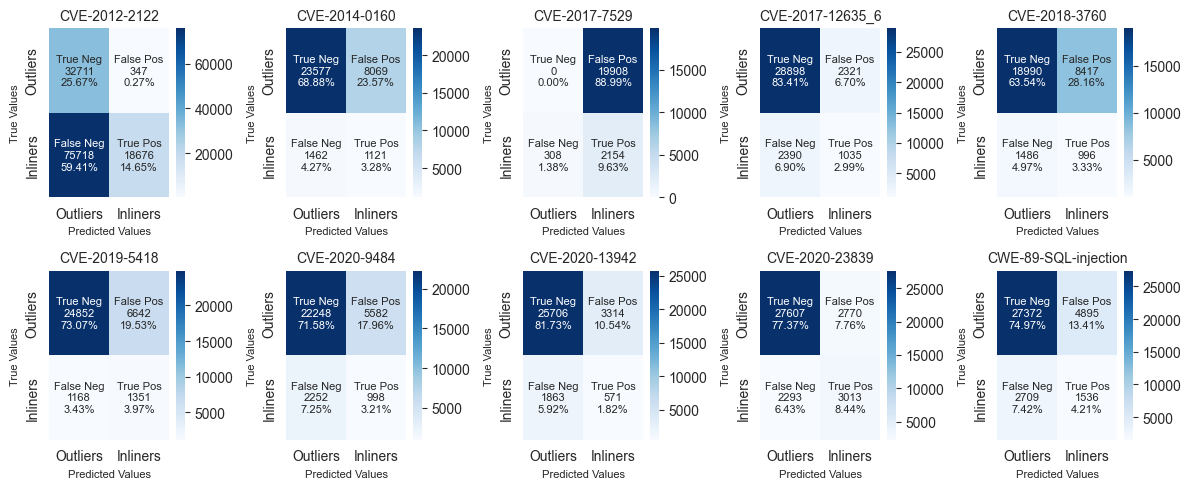

In [182]:
# True Negative: Top Left
# False Postive: Top Right
# False Negative: Bottom Left
# True Positive: Bottom Right

# Confusion Matrices
cms = {}
for key in results.keys():
    C = confusion_matrix(
        y_true=y_true[key], y_pred=results[key]["LocalOutlierFactor_predictions"]
    )
    # dictionary with scenario name as key and confusion matrix as value
    dict_ = {key: C}
    cms.update(dict_)

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
# CVE-2012-2122
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2012-2122"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2012-2122"].flatten() / np.sum(cms["CVE-2012-2122"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(
    cms["CVE-2012-2122"],
    annot=labels,
    annot_kws={"fontsize": 8},
    fmt="2",
    cmap="Blues",
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 0],
)
axes[0, 0].set_title("CVE-2012-2122", size=10)
axes[0, 0].set_xlabel("Predicted Values", size=8)
axes[0, 0].set_ylabel("True Values", size=8)

# CVE-2014-0160
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2014-0160"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2014-0160"].flatten() / np.sum(cms["CVE-2014-0160"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2014-0160"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 1],
)
axes[0, 1].set_title("CVE-2014-0160", size=10)
axes[0, 1].set_xlabel("Predicted Values", size=8)
axes[0, 1].set_ylabel("True Values", size=8)


# CVE-2017-7529
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2017-7529"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2017-7529"].flatten() / np.sum(cms["CVE-2017-7529"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2017-7529"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 2],
)
axes[0, 2].set_title("CVE-2017-7529", size=10)
axes[0, 2].set_xlabel("Predicted Values", size=8)
axes[0, 2].set_ylabel("True Values", size=8)


# CVE-2017-12635_6
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2017-12635_6"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2017-12635_6"].flatten() / np.sum(cms["CVE-2017-12635_6"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2017-12635_6"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 3],
)
axes[0, 3].set_title("CVE-2017-12635_6", size=10)
axes[0, 3].set_xlabel("Predicted Values", size=8)
axes[0, 3].set_ylabel("True Values", size=8)


# CVE-2018-3760
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2018-3760"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2018-3760"].flatten() / np.sum(cms["CVE-2018-3760"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2018-3760"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 4],
)
axes[0, 4].set_title("CVE-2018-3760", size=10)
axes[0, 4].set_xlabel("Predicted Values", size=8)
axes[0, 4].set_ylabel("True Values", size=8)


# CVE-2019-5418
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2019-5418"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2019-5418"].flatten() / np.sum(cms["CVE-2019-5418"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2019-5418"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 0],
)
axes[1, 0].set_title("CVE-2019-5418", size=10)
axes[1, 0].set_xlabel("Predicted Values", size=8)
axes[1, 0].set_ylabel("True Values", size=8)

# CVE-2020-9484
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2020-9484"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2020-9484"].flatten() / np.sum(cms["CVE-2020-9484"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2020-9484"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 1],
)
axes[1, 1].set_title("CVE-2020-9484", size=10)
axes[1, 1].set_xlabel("Predicted Values", size=8)
axes[1, 1].set_ylabel("True Values", size=8)


# CVE-2020-13942
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2020-13942"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2020-13942"].flatten() / np.sum(cms["CVE-2020-13942"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2020-13942"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 2],
)
axes[1, 2].set_title("CVE-2020-13942", size=10)
axes[1, 2].set_xlabel("Predicted Values", size=8)
axes[1, 2].set_ylabel("True Values", size=8)


# CVE-2020-23839
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2020-23839"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2020-23839"].flatten() / np.sum(cms["CVE-2020-23839"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2020-23839"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 3],
)
axes[1, 3].set_title("CVE-2020-23839", size=10)
axes[1, 3].set_xlabel("Predicted Values", size=8)
axes[1, 3].set_ylabel("True Values", size=8)


# CWE-89-SQL-injection
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = [
    "{0:0.0f}".format(value) for value in cms["CWE-89-SQL-injection"].flatten()
]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CWE-89-SQL-injection"].flatten()
    / np.sum(cms["CWE-89-SQL-injection"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CWE-89-SQL-injection"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 4],
)
axes[1, 4].set_title("CWE-89-SQL-injection", size=10)
axes[1, 4].set_xlabel("Predicted Values", size=8)
axes[1, 4].set_ylabel("True Values", size=8)


fig.tight_layout()
plt.show()
fig.savefig("../../../src/plots/models/LOF_ConfusionMatrix_no_outliers_testdata.png")

In [183]:
# get rates to evaluate the results
pd.options.display.float_format = "{:.2f}".format
data = {}
for key in cms.keys():
    true_negative = cms[key][0, 0]
    false_positve = cms[key][0, 1]
    false_negative = cms[key][1, 0]
    true_positve = cms[key][1, 1]
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = true_positve / (true_positve + false_negative)
    # Specificity or true negative rate
    TNR = true_negative / (true_negative + false_positve)
    # Precision or positive predictive value
    PPV = true_positve / (true_positve + false_positve)
    # Negative predictive value
    NPV = true_negative / (true_negative + false_negative)
    # Fall out or false positive rate
    FPR = false_positve / (false_positve + true_negative)
    # False negative rate
    FNR = false_negative / (true_positve + false_negative)
    # False discovery rate
    FDR = false_positve / (true_positve + false_positve)
    # Overall accuracy
    ACC = (true_positve + true_negative) / (
        true_positve + false_positve + false_negative + true_negative
    )
    # F1 Score
    F1 = 2 * (PPV * TPR) / (PPV + TPR)

    data[key] = {
        "FPR": FPR,
        "FNR": FNR,
        "Recall": TPR,
        "Precision": PPV,
        "ACC": ACC,
        "F1": F1,
    }
# print dataframe
output = pd.DataFrame(data).transpose()
# False Postive Rate (FPR) good because this means that only 7% of the anomalies detected were in fact, not anomalous at all.
# False Negative Rate (FNR) This means that the system missed only 15% of all anomalies in the data.
output.to_latex("../../../src/tables/LOF_Table_FPR_FNR_ACC_TEST_no_outliers.tex")

In [184]:
output

,FPR,FNR,Recall,Precision,ACC,F1
CVE-2012-2122,0.01,0.80,0.20,0.98,0.40,0.33
CVE-2014-0160,0.25,0.57,0.43,0.12,0.72,0.19
CVE-2017-7529,1.00,0.13,0.87,0.10,0.10,0.18
CVE-2017-12635_6,0.07,0.70,0.30,0.31,0.86,0.31
CVE-2018-3760,0.31,0.60,0.40,0.11,0.67,0.17
CVE-2019-5418,0.21,0.46,0.54,0.17,0.77,0.26
CVE-2020-9484,0.20,0.69,0.31,0.15,0.75,0.20
CVE-2020-13942,0.11,0.77,0.23,0.15,0.84,0.18
CVE-2020-23839,0.09,0.43,0.57,0.52,0.86,0.54
CWE-89-SQL-injection,0.15,0.64,0.36,0.24,0.79,0.29


### Evaluation after Threshold Adjustment

Attempt to reduce of False Postives. Negative scores represent outliers, positive scores represent inliers.
To be ever more specific, if the new threshold line is 0.3 then everything above 0.3 would be positive, either True Positives or False Positives. Everything below 0.3 would be predicted negative, True Negatives and False Negatives. 

In [185]:
thresholds_ = {}
for i in range(0, len(scenarios)):
    # prepare test data
    X_test = no_outliers[scenarios[i]]
    X_test = select_columns_for_modelling(X_test)
    scores = models[scenarios[i]].decision_function(X_test)
    fpr_test_, tpr_test_, thresholds = roc_curve(y_true[scenarios[i]], scores)
    J = tpr_test_ - fpr_test_
    ix = np.argmax(J)
    best_thresh = thresholds[ix]
    thresholds_[scenarios[i]] = best_thresh

In [186]:
thresholds_

{'CVE-2012-2122': 1.044525878281619,
 'CVE-2014-0160': 3.658717066269874,
 'CVE-2017-7529': 144887209.2159467,
 'CVE-2017-12635_6': 1.0540442943660817,
 'CVE-2018-3760': 1.1100460933295826,
 'CVE-2019-5418': 1.1504785042701162,
 'CVE-2020-9484': 2.4545420884415874,
 'CVE-2020-13942': 1.0667556917434022,
 'CVE-2020-23839': 1.1297693379187412,
 'CWE-89-SQL-injection': 1.1078361646046677}

In [187]:
for key in thresholds_.keys():
    results[key].loc[
        (results[key]["LocalOutlierFactor_scores"] > thresholds_[key]),
        "LocalOutlierFactor_predictions",
    ] = 1

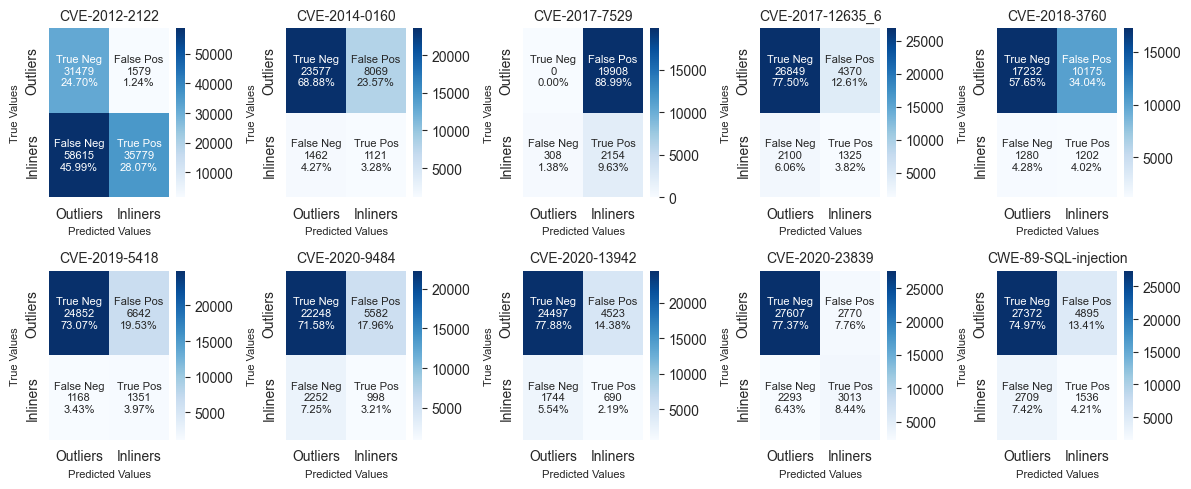

In [188]:
# True Negative: Top Left
# False Postive: Top Right
# False Negative: Bottom Left
# True Positive: Bottom Right

# Confusion Matrices
cms = {}
for key in results.keys():
    C = confusion_matrix(
        y_true=y_true[key], y_pred=results[key]["LocalOutlierFactor_predictions"]
    )
    # dictionary with scenario name as key and confusion matrix as value
    dict_ = {key: C}
    cms.update(dict_)

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
# CVE-2012-2122
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2012-2122"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2012-2122"].flatten() / np.sum(cms["CVE-2012-2122"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(
    cms["CVE-2012-2122"],
    annot=labels,
    annot_kws={"fontsize": 8},
    fmt="2",
    cmap="Blues",
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 0],
)
axes[0, 0].set_title("CVE-2012-2122", size=10)
axes[0, 0].set_xlabel("Predicted Values", size=8)
axes[0, 0].set_ylabel("True Values", size=8)

# CVE-2014-0160
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2014-0160"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2014-0160"].flatten() / np.sum(cms["CVE-2014-0160"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2014-0160"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 1],
)
axes[0, 1].set_title("CVE-2014-0160", size=10)
axes[0, 1].set_xlabel("Predicted Values", size=8)
axes[0, 1].set_ylabel("True Values", size=8)


# CVE-2017-7529
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2017-7529"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2017-7529"].flatten() / np.sum(cms["CVE-2017-7529"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2017-7529"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 2],
)
axes[0, 2].set_title("CVE-2017-7529", size=10)
axes[0, 2].set_xlabel("Predicted Values", size=8)
axes[0, 2].set_ylabel("True Values", size=8)


# CVE-2017-12635_6
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2017-12635_6"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2017-12635_6"].flatten() / np.sum(cms["CVE-2017-12635_6"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2017-12635_6"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 3],
)
axes[0, 3].set_title("CVE-2017-12635_6", size=10)
axes[0, 3].set_xlabel("Predicted Values", size=8)
axes[0, 3].set_ylabel("True Values", size=8)


# CVE-2018-3760
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2018-3760"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2018-3760"].flatten() / np.sum(cms["CVE-2018-3760"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2018-3760"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 4],
)
axes[0, 4].set_title("CVE-2018-3760", size=10)
axes[0, 4].set_xlabel("Predicted Values", size=8)
axes[0, 4].set_ylabel("True Values", size=8)


# CVE-2019-5418
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2019-5418"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2019-5418"].flatten() / np.sum(cms["CVE-2019-5418"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2019-5418"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 0],
)
axes[1, 0].set_title("CVE-2019-5418", size=10)
axes[1, 0].set_xlabel("Predicted Values", size=8)
axes[1, 0].set_ylabel("True Values", size=8)

# CVE-2020-9484
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2020-9484"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2020-9484"].flatten() / np.sum(cms["CVE-2020-9484"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2020-9484"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 1],
)
axes[1, 1].set_title("CVE-2020-9484", size=10)
axes[1, 1].set_xlabel("Predicted Values", size=8)
axes[1, 1].set_ylabel("True Values", size=8)


# CVE-2020-13942
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2020-13942"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2020-13942"].flatten() / np.sum(cms["CVE-2020-13942"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2020-13942"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 2],
)
axes[1, 2].set_title("CVE-2020-13942", size=10)
axes[1, 2].set_xlabel("Predicted Values", size=8)
axes[1, 2].set_ylabel("True Values", size=8)


# CVE-2020-23839
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2020-23839"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2020-23839"].flatten() / np.sum(cms["CVE-2020-23839"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2020-23839"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 3],
)
axes[1, 3].set_title("CVE-2020-23839", size=10)
axes[1, 3].set_xlabel("Predicted Values", size=8)
axes[1, 3].set_ylabel("True Values", size=8)


# CWE-89-SQL-injection
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = [
    "{0:0.0f}".format(value) for value in cms["CWE-89-SQL-injection"].flatten()
]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CWE-89-SQL-injection"].flatten()
    / np.sum(cms["CWE-89-SQL-injection"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CWE-89-SQL-injection"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 4],
)
axes[1, 4].set_title("CWE-89-SQL-injection", size=10)
axes[1, 4].set_xlabel("Predicted Values", size=8)
axes[1, 4].set_ylabel("True Values", size=8)


fig.tight_layout()
plt.show()
fig.savefig(
    "../../../src/plots/models/LOF_ConfusionMatrix_no_outliers__threshold_adjustment_testdata.png"
)

In [189]:
# get rates to evaluate the results
pd.options.display.float_format = "{:.2f}".format
data = {}
for key in cms.keys():
    true_negative = cms[key][0, 0]
    false_positve = cms[key][0, 1]
    false_negative = cms[key][1, 0]
    true_positve = cms[key][1, 1]
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = true_positve / (true_positve + false_negative)
    # Specificity or true negative rate
    TNR = true_negative / (true_negative + false_positve)
    # Precision or positive predictive value
    PPV = true_positve / (true_positve + false_positve)
    # Negative predictive value
    NPV = true_negative / (true_negative + false_negative)
    # Fall out or false positive rate
    FPR = false_positve / (false_positve + true_negative)
    # False negative rate
    FNR = false_negative / (true_positve + false_negative)
    # False discovery rate
    FDR = false_positve / (true_positve + false_positve)
    # Overall accuracy
    ACC = (true_positve + true_negative) / (
        true_positve + false_positve + false_negative + true_negative
    )
    # F1 Score
    F1 = 2 * (PPV * TPR) / (PPV + TPR)

    data[key] = {
        "FPR": FPR,
        "FNR": FNR,
        "Recall": TPR,
        "Precision": PPV,
        "ACC": ACC,
        "F1": F1,
    }
# print dataframe
output = pd.DataFrame(data).transpose()
# False Postive Rate (FPR) good because this means that only 7% of the anomalies detected were in fact, not anomalous at all.
# False Negative Rate (FNR) This means that the system missed only 15% of all anomalies in the data.
output.to_latex(
    "../../../src/tables/LOF_Table_FPR_FNR_ACC_TEST_no_outliers_treshold_adjustment.tex"
)

In [190]:
output

,FPR,FNR,Recall,Precision,ACC,F1
CVE-2012-2122,0.05,0.62,0.38,0.96,0.53,0.54
CVE-2014-0160,0.25,0.57,0.43,0.12,0.72,0.19
CVE-2017-7529,1.00,0.13,0.87,0.10,0.10,0.18
CVE-2017-12635_6,0.14,0.61,0.39,0.23,0.81,0.29
CVE-2018-3760,0.37,0.52,0.48,0.11,0.62,0.17
CVE-2019-5418,0.21,0.46,0.54,0.17,0.77,0.26
CVE-2020-9484,0.20,0.69,0.31,0.15,0.75,0.20
CVE-2020-13942,0.16,0.72,0.28,0.13,0.80,0.18
CVE-2020-23839,0.09,0.43,0.57,0.52,0.86,0.54
CWE-89-SQL-injection,0.15,0.64,0.36,0.24,0.79,0.29


## Results after adjusting the contamination rate dynamically


- Results with natural outliers
- Results no natural outliers

In [191]:
# load model
models = {}
for i in range(0, len(scenarios)):
    # get dict and save mofel for each scenario
    models[scenarios[i]] = load_model(
        model_type="LocalOutlierFactor",
        train_data=TRAIN,
        test_data=TEST,
        scenario=scenarios[i],
        contamination_rate=True,
    )

CVE-2012-2122:0.5
CVE-2014-0160:0.07508720930232558
CVE-2017-7529:0.07513427734375
CVE-2017-12635_6:0.1007916188458256
CVE-2018-3760:0.07467131983513343
CVE-2019-5418:0.07250172691687773
CVE-2020-9484:0.09392249226945641
CVE-2020-13942:0.0708319995343829
CVE-2020-23839:0.1532595823344213
CWE-89-SQL-injection:0.1235052806144715


In [192]:
# get preditions
results = {}
for i in range(0, len(scenarios)):
    _, _, results[scenarios[i]] = predict_(
        models[scenarios[i]],
        model_type="LocalOutlierFactor",
        data=TEST,
        scenario=scenarios[i],
    )
# remember 1 outliers, 0 inliners

In [193]:
# get true values to evaluate algorithm
y_true = {}
for i in range(0, len(scenarios)):
    y_true[scenarios[i]] = encode(TEST[scenarios[i]])[
        "exploit"
    ]  # remember 0 = inliners, 1 = outliers

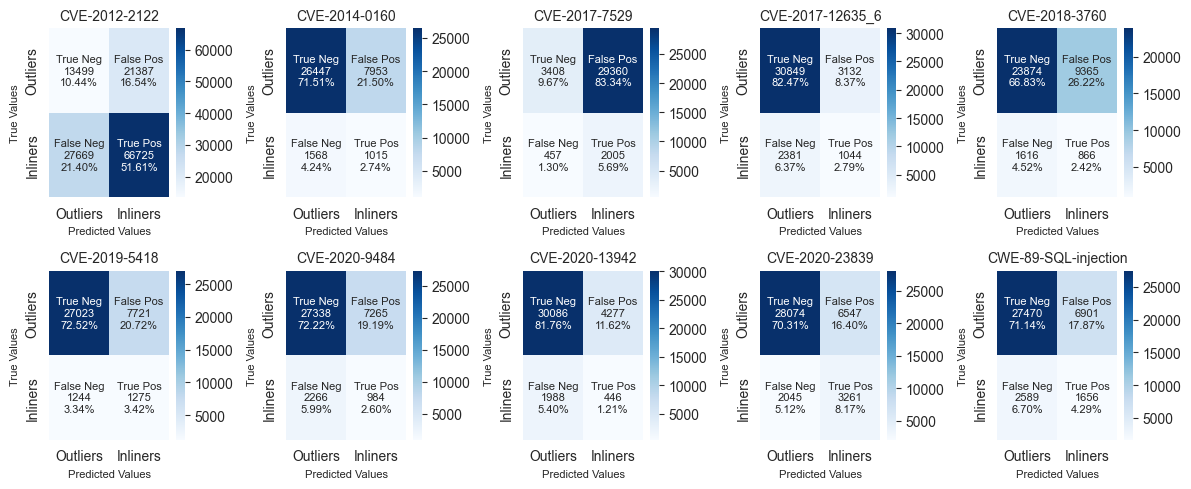

In [194]:
# True Negative: Top Left
# False Postive: Top Right
# False Negative: Bottom Left
# True Positive: Bottom Right

# Confusion Matrices
cms = {}
for key in results.keys():
    C = confusion_matrix(
        y_true=y_true[key], y_pred=results[key]["LocalOutlierFactor_predictions"]
    )
    # dictionary with scenario name as key and confusion matrix as value
    dict_ = {key: C}
    cms.update(dict_)

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
# CVE-2012-2122
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2012-2122"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2012-2122"].flatten() / np.sum(cms["CVE-2012-2122"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(
    cms["CVE-2012-2122"],
    annot=labels,
    annot_kws={"fontsize": 8},
    fmt="2",
    cmap="Blues",
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 0],
)
axes[0, 0].set_title("CVE-2012-2122", size=10)
axes[0, 0].set_xlabel("Predicted Values", size=8)
axes[0, 0].set_ylabel("True Values", size=8)

# CVE-2014-0160
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2014-0160"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2014-0160"].flatten() / np.sum(cms["CVE-2014-0160"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2014-0160"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 1],
)
axes[0, 1].set_title("CVE-2014-0160", size=10)
axes[0, 1].set_xlabel("Predicted Values", size=8)
axes[0, 1].set_ylabel("True Values", size=8)


# CVE-2017-7529
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2017-7529"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2017-7529"].flatten() / np.sum(cms["CVE-2017-7529"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2017-7529"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 2],
)
axes[0, 2].set_title("CVE-2017-7529", size=10)
axes[0, 2].set_xlabel("Predicted Values", size=8)
axes[0, 2].set_ylabel("True Values", size=8)


# CVE-2017-12635_6
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2017-12635_6"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2017-12635_6"].flatten() / np.sum(cms["CVE-2017-12635_6"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2017-12635_6"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 3],
)
axes[0, 3].set_title("CVE-2017-12635_6", size=10)
axes[0, 3].set_xlabel("Predicted Values", size=8)
axes[0, 3].set_ylabel("True Values", size=8)


# CVE-2018-3760
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2018-3760"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2018-3760"].flatten() / np.sum(cms["CVE-2018-3760"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2018-3760"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 4],
)
axes[0, 4].set_title("CVE-2018-3760", size=10)
axes[0, 4].set_xlabel("Predicted Values", size=8)
axes[0, 4].set_ylabel("True Values", size=8)


# CVE-2019-5418
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2019-5418"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2019-5418"].flatten() / np.sum(cms["CVE-2019-5418"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2019-5418"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 0],
)
axes[1, 0].set_title("CVE-2019-5418", size=10)
axes[1, 0].set_xlabel("Predicted Values", size=8)
axes[1, 0].set_ylabel("True Values", size=8)

# CVE-2020-9484
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2020-9484"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2020-9484"].flatten() / np.sum(cms["CVE-2020-9484"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2020-9484"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 1],
)
axes[1, 1].set_title("CVE-2020-9484", size=10)
axes[1, 1].set_xlabel("Predicted Values", size=8)
axes[1, 1].set_ylabel("True Values", size=8)


# CVE-2020-13942
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2020-13942"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2020-13942"].flatten() / np.sum(cms["CVE-2020-13942"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2020-13942"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 2],
)
axes[1, 2].set_title("CVE-2020-13942", size=10)
axes[1, 2].set_xlabel("Predicted Values", size=8)
axes[1, 2].set_ylabel("True Values", size=8)


# CVE-2020-23839
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2020-23839"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2020-23839"].flatten() / np.sum(cms["CVE-2020-23839"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2020-23839"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 3],
)
axes[1, 3].set_title("CVE-2020-23839", size=10)
axes[1, 3].set_xlabel("Predicted Values", size=8)
axes[1, 3].set_ylabel("True Values", size=8)


# CWE-89-SQL-injection
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = [
    "{0:0.0f}".format(value) for value in cms["CWE-89-SQL-injection"].flatten()
]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CWE-89-SQL-injection"].flatten()
    / np.sum(cms["CWE-89-SQL-injection"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CWE-89-SQL-injection"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 4],
)
axes[1, 4].set_title("CWE-89-SQL-injection", size=10)
axes[1, 4].set_xlabel("Predicted Values", size=8)
axes[1, 4].set_ylabel("True Values", size=8)


fig.tight_layout()
plt.show()
fig.savefig(
    "../../../src/plots/models/LOF_ConfusionMatrix_contamination_rate_testdata.png"
)

In [195]:
# get rates to evaluate the results
pd.options.display.float_format = "{:.2f}".format
data = {}
for key in cms.keys():
    true_negative = cms[key][0, 0]
    false_positve = cms[key][0, 1]
    false_negative = cms[key][1, 0]
    true_positve = cms[key][1, 1]
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = true_positve / (true_positve + false_negative)
    # Specificity or true negative rate
    TNR = true_negative / (true_negative + false_positve)
    # Precision or positive predictive value
    PPV = true_positve / (true_positve + false_positve)
    # Negative predictive value
    NPV = true_negative / (true_negative + false_negative)
    # Fall out or false positive rate
    FPR = false_positve / (false_positve + true_negative)
    # False negative rate
    FNR = false_negative / (true_positve + false_negative)
    # False discovery rate
    FDR = false_positve / (true_positve + false_positve)
    # Overall accuracy
    ACC = (true_positve + true_negative) / (
        true_positve + false_positve + false_negative + true_negative
    )
    # F1 Score
    F1 = 2 * (PPV * TPR) / (PPV + TPR)

    data[key] = {
        "FPR": FPR,
        "FNR": FNR,
        "Recall": TPR,
        "Precision": PPV,
        "ACC": ACC,
        "F1": F1,
    }
# print dataframe
output = pd.DataFrame(data).transpose()
# False Postive Rate (FPR) good because this means that only 7% of the anomalies detected were in fact, not anomalous at all.
# False Negative Rate (FNR) This means that the system missed only 15% of all anomalies in the data.
output.to_latex("../../../src/tables/LOF_Table_FPR_FNR_ACC_TEST_contamination_rate.tex")

In [196]:
output

,FPR,FNR,Recall,Precision,ACC,F1
CVE-2012-2122,0.61,0.29,0.71,0.76,0.62,0.73
CVE-2014-0160,0.23,0.61,0.39,0.11,0.74,0.18
CVE-2017-7529,0.90,0.19,0.81,0.06,0.15,0.12
CVE-2017-12635_6,0.09,0.70,0.30,0.25,0.85,0.27
CVE-2018-3760,0.28,0.65,0.35,0.08,0.69,0.14
CVE-2019-5418,0.22,0.49,0.51,0.14,0.76,0.22
CVE-2020-9484,0.21,0.70,0.30,0.12,0.75,0.17
CVE-2020-13942,0.12,0.82,0.18,0.09,0.83,0.12
CVE-2020-23839,0.19,0.39,0.61,0.33,0.78,0.43
CWE-89-SQL-injection,0.20,0.61,0.39,0.19,0.75,0.26


In [197]:
# get preditions
results = {}
for i in range(0, len(scenarios)):
    _, _, results[scenarios[i]] = predict_(
        models[scenarios[i]],
        model_type="LocalOutlierFactor",
        data=no_outliers,
        scenario=scenarios[i],
    )
# remember 1 outliers, 0 inliners

In [198]:
# get true values to evaluate algorithm
y_true = {}
for i in range(0, len(scenarios)):
    y_true[scenarios[i]] = encode(no_outliers[scenarios[i]])[
        "exploit"
    ]  # remember 0 = inliners, 1 = outliers

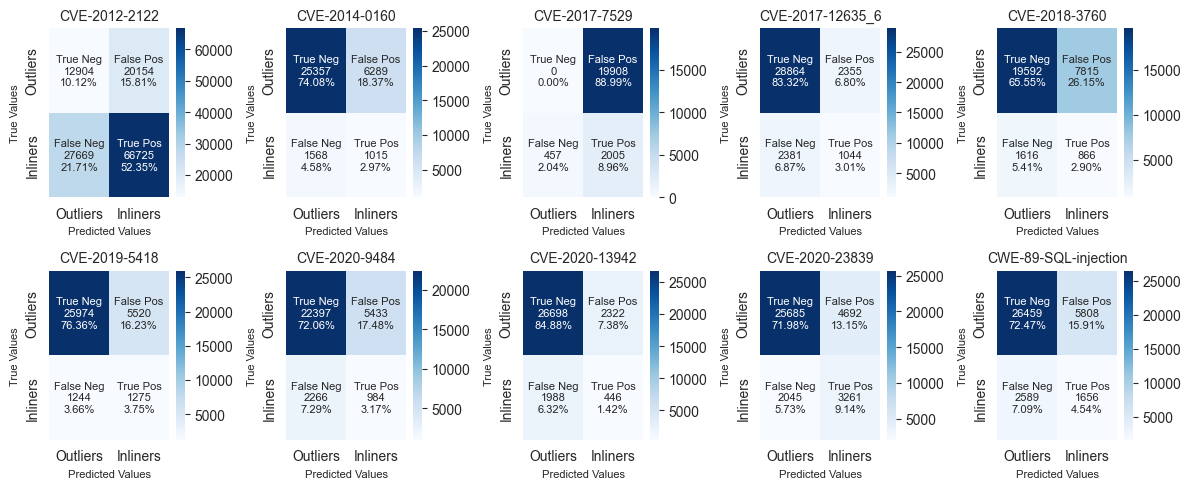

In [199]:
# True Negative: Top Left
# False Postive: Top Right
# False Negative: Bottom Left
# True Positive: Bottom Right

# Confusion Matrices
cms = {}
for key in results.keys():
    C = confusion_matrix(
        y_true=y_true[key], y_pred=results[key]["LocalOutlierFactor_predictions"]
    )
    # dictionary with scenario name as key and confusion matrix as value
    dict_ = {key: C}
    cms.update(dict_)

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
# CVE-2012-2122
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2012-2122"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2012-2122"].flatten() / np.sum(cms["CVE-2012-2122"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(
    cms["CVE-2012-2122"],
    annot=labels,
    annot_kws={"fontsize": 8},
    fmt="2",
    cmap="Blues",
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 0],
)
axes[0, 0].set_title("CVE-2012-2122", size=10)
axes[0, 0].set_xlabel("Predicted Values", size=8)
axes[0, 0].set_ylabel("True Values", size=8)

# CVE-2014-0160
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2014-0160"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2014-0160"].flatten() / np.sum(cms["CVE-2014-0160"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2014-0160"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 1],
)
axes[0, 1].set_title("CVE-2014-0160", size=10)
axes[0, 1].set_xlabel("Predicted Values", size=8)
axes[0, 1].set_ylabel("True Values", size=8)


# CVE-2017-7529
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2017-7529"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2017-7529"].flatten() / np.sum(cms["CVE-2017-7529"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2017-7529"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 2],
)
axes[0, 2].set_title("CVE-2017-7529", size=10)
axes[0, 2].set_xlabel("Predicted Values", size=8)
axes[0, 2].set_ylabel("True Values", size=8)


# CVE-2017-12635_6
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2017-12635_6"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2017-12635_6"].flatten() / np.sum(cms["CVE-2017-12635_6"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2017-12635_6"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 3],
)
axes[0, 3].set_title("CVE-2017-12635_6", size=10)
axes[0, 3].set_xlabel("Predicted Values", size=8)
axes[0, 3].set_ylabel("True Values", size=8)


# CVE-2018-3760
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2018-3760"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2018-3760"].flatten() / np.sum(cms["CVE-2018-3760"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2018-3760"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[0, 4],
)
axes[0, 4].set_title("CVE-2018-3760", size=10)
axes[0, 4].set_xlabel("Predicted Values", size=8)
axes[0, 4].set_ylabel("True Values", size=8)


# CVE-2019-5418
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2019-5418"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2019-5418"].flatten() / np.sum(cms["CVE-2019-5418"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2019-5418"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 0],
)
axes[1, 0].set_title("CVE-2019-5418", size=10)
axes[1, 0].set_xlabel("Predicted Values", size=8)
axes[1, 0].set_ylabel("True Values", size=8)

# CVE-2020-9484
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2020-9484"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2020-9484"].flatten() / np.sum(cms["CVE-2020-9484"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2020-9484"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 1],
)
axes[1, 1].set_title("CVE-2020-9484", size=10)
axes[1, 1].set_xlabel("Predicted Values", size=8)
axes[1, 1].set_ylabel("True Values", size=8)


# CVE-2020-13942
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2020-13942"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2020-13942"].flatten() / np.sum(cms["CVE-2020-13942"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2020-13942"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 2],
)
axes[1, 2].set_title("CVE-2020-13942", size=10)
axes[1, 2].set_xlabel("Predicted Values", size=8)
axes[1, 2].set_ylabel("True Values", size=8)


# CVE-2020-23839
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cms["CVE-2020-23839"].flatten()]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CVE-2020-23839"].flatten() / np.sum(cms["CVE-2020-23839"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CVE-2020-23839"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 3],
)
axes[1, 3].set_title("CVE-2020-23839", size=10)
axes[1, 3].set_xlabel("Predicted Values", size=8)
axes[1, 3].set_ylabel("True Values", size=8)


# CWE-89-SQL-injection
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = [
    "{0:0.0f}".format(value) for value in cms["CWE-89-SQL-injection"].flatten()
]
group_percentages = [
    "{0:.2%}".format(value)
    for value in cms["CWE-89-SQL-injection"].flatten()
    / np.sum(cms["CWE-89-SQL-injection"])
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)


sns.heatmap(
    cms["CWE-89-SQL-injection"],
    annot=labels,
    fmt="2",
    cmap="Blues",
    annot_kws={"fontsize": 8},
    xticklabels=["Outliers", "Inliners"],
    yticklabels=["Outliers", "Inliners"],
    ax=axes[1, 4],
)
axes[1, 4].set_title("CWE-89-SQL-injection", size=10)
axes[1, 4].set_xlabel("Predicted Values", size=8)
axes[1, 4].set_ylabel("True Values", size=8)


fig.tight_layout()
plt.show()
fig.savefig(
    "../../../src/plots/models/LOF_ConfusionMatrix_contamination_rate_no_outliers.png"
)

In [200]:
# get rates to evaluate the results
pd.options.display.float_format = "{:.2f}".format
data = {}
for key in cms.keys():
    true_negative = cms[key][0, 0]
    false_positve = cms[key][0, 1]
    false_negative = cms[key][1, 0]
    true_positve = cms[key][1, 1]
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = true_positve / (true_positve + false_negative)
    # Specificity or true negative rate
    TNR = true_negative / (true_negative + false_positve)
    # Precision or positive predictive value
    PPV = true_positve / (true_positve + false_positve)
    # Negative predictive value
    NPV = true_negative / (true_negative + false_negative)
    # Fall out or false positive rate
    FPR = false_positve / (false_positve + true_negative)
    # False negative rate
    FNR = false_negative / (true_positve + false_negative)
    # False discovery rate
    FDR = false_positve / (true_positve + false_positve)
    # Overall accuracy
    ACC = (true_positve + true_negative) / (
        true_positve + false_positve + false_negative + true_negative
    )
    # F1 Score
    F1 = 2 * (PPV * TPR) / (PPV + TPR)

    data[key] = {
        "FPR": FPR,
        "FNR": FNR,
        "Recall": TPR,
        "Precision": PPV,
        "ACC": ACC,
        "F1": F1,
    }
# print dataframe
output = pd.DataFrame(data).transpose()
# False Postive Rate (FPR) good because this means that only 7% of the anomalies detected were in fact, not anomalous at all.
# False Negative Rate (FNR) This means that the system missed only 15% of all anomalies in the data.
output.to_latex(
    "../../../src/tables/LOF_Table_FPR_FNR_ACC_TEST_contamination_rate_no_outliers.tex"
)

In [201]:
output

,FPR,FNR,Recall,Precision,ACC,F1
CVE-2012-2122,0.61,0.29,0.71,0.77,0.62,0.74
CVE-2014-0160,0.20,0.61,0.39,0.14,0.77,0.21
CVE-2017-7529,1.00,0.19,0.81,0.09,0.09,0.16
CVE-2017-12635_6,0.08,0.70,0.30,0.31,0.86,0.31
CVE-2018-3760,0.29,0.65,0.35,0.10,0.68,0.16
CVE-2019-5418,0.18,0.49,0.51,0.19,0.80,0.27
CVE-2020-9484,0.20,0.70,0.30,0.15,0.75,0.20
CVE-2020-13942,0.08,0.82,0.18,0.16,0.86,0.17
CVE-2020-23839,0.15,0.39,0.61,0.41,0.81,0.49
CWE-89-SQL-injection,0.18,0.61,0.39,0.22,0.77,0.28


## Which data points identify as False Positves and why? 
- Scenario CVE-2012-2122 
- Scenario CVE-2020-9484

In [202]:
# look at the complete data
for i in range(0, len(scenarios)):
    results[scenarios[i]]["True_Exploit"] = y_true[scenarios[i]]

In [203]:
fp_CVE_2012_2122 = results["CVE-2012-2122"][
    (results["CVE-2012-2122"]["True_Exploit"] == 0)
    & (results["CVE-2012-2122"]["LocalOutlierFactor_predictions"] == 1)
]
tp_CVE_2012_2122 = results["CVE-2012-2122"][
    (results["CVE-2012-2122"]["True_Exploit"] == 1)
    & (results["CVE-2012-2122"]["LocalOutlierFactor_predictions"] == 1)
]
fp_CVE_2020_9484 = results["CVE-2020-9484"][
    (results["CVE-2020-9484"]["True_Exploit"] == 0)
    & (results["CVE-2020-9484"]["LocalOutlierFactor_predictions"] == 1)
]
tp_CVE_2020_9484 = results["CVE-2020-9484"][
    (results["CVE-2020-9484"]["True_Exploit"] == 1)
    & (results["CVE-2020-9484"]["LocalOutlierFactor_predictions"] == 1)
]

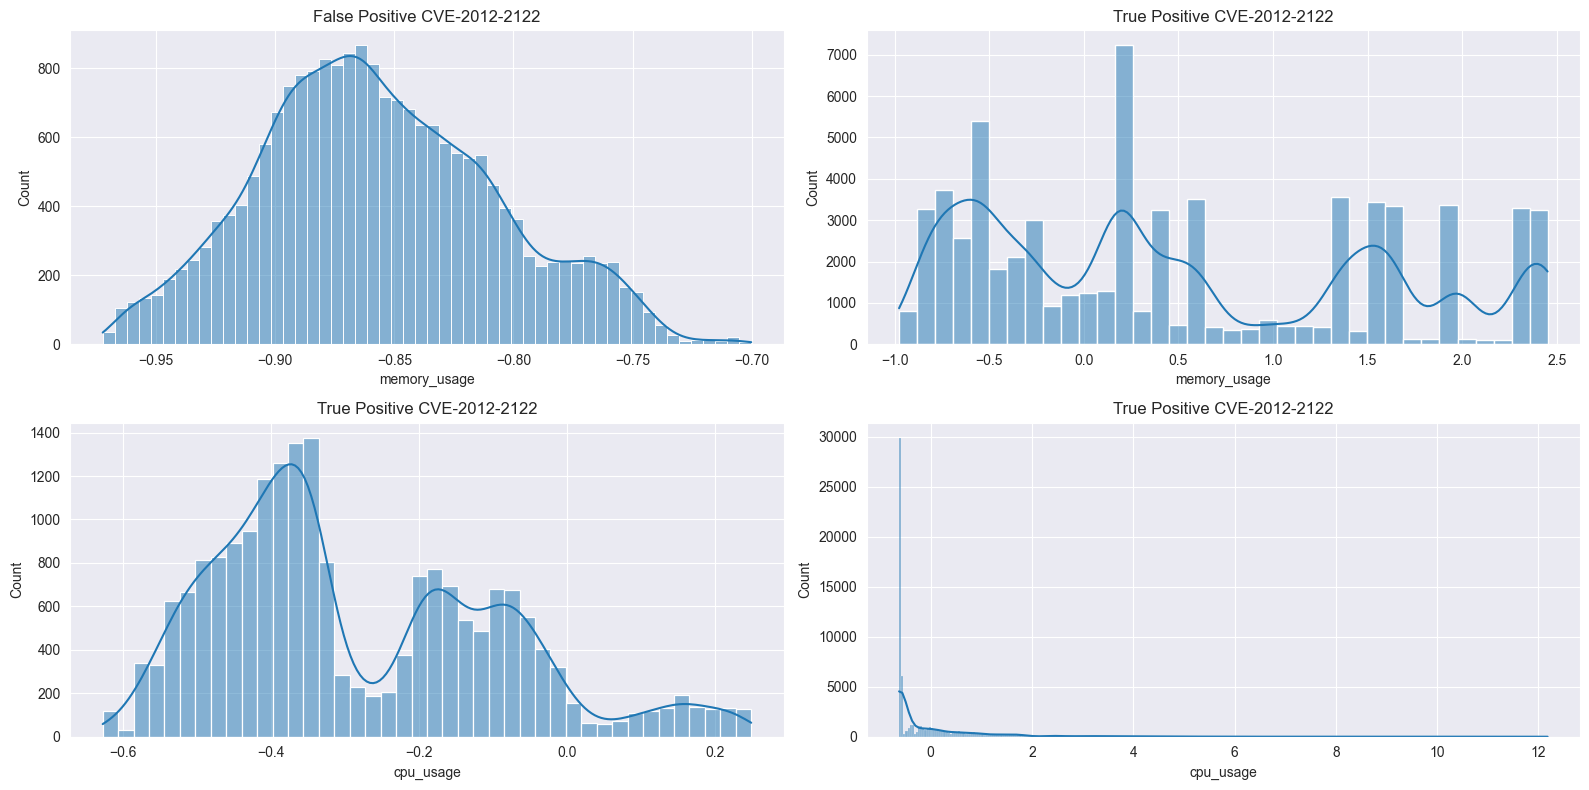

In [204]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(2, 2, sharex=False, figsize=(16, 8))
sns.histplot(data=fp_CVE_2012_2122, x="memory_usage", kde=True, ax=axes[0, 0])
axes[0, 0].title.set_text("False Positive CVE-2012-2122")
sns.histplot(data=tp_CVE_2012_2122, x="memory_usage", kde=True, ax=axes[0, 1])
axes[0, 1].title.set_text("True Positive CVE-2012-2122")
sns.histplot(data=fp_CVE_2012_2122, x="cpu_usage", kde=True, ax=axes[1, 0])
axes[1, 0].title.set_text("True Positive CVE-2012-2122")
sns.histplot(data=tp_CVE_2012_2122, x="cpu_usage", kde=True, ax=axes[1, 1])
axes[1, 1].title.set_text("True Positive CVE-2012-2122")
fig.tight_layout()
plt.show()

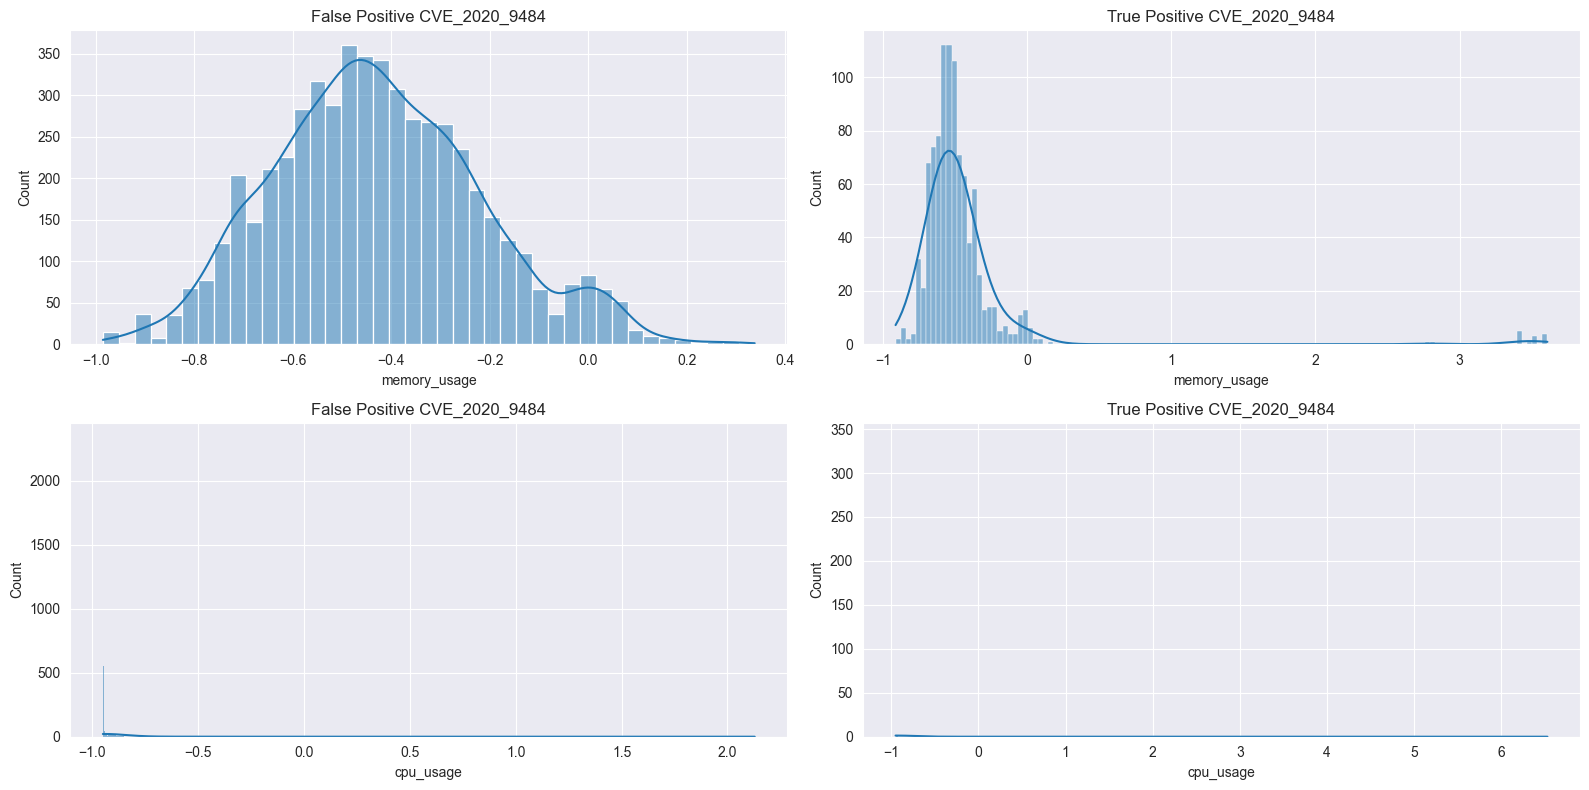

In [205]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(2, 2, sharex=False, figsize=(16, 8))
sns.histplot(data=fp_CVE_2020_9484, x="memory_usage", kde=True, ax=axes[0, 0])
axes[0, 0].title.set_text("False Positive CVE_2020_9484")
sns.histplot(data=tp_CVE_2020_9484, x="memory_usage", kde=True, ax=axes[0, 1])
axes[0, 1].title.set_text("True Positive CVE_2020_9484")
sns.histplot(data=fp_CVE_2020_9484, x="cpu_usage", kde=True, ax=axes[1, 0])
axes[1, 0].title.set_text("False Positive CVE_2020_9484")
sns.histplot(data=tp_CVE_2020_9484, x="cpu_usage", kde=True, ax=axes[1, 1])
axes[1, 1].title.set_text("True Positive CVE_2020_9484")
fig.tight_layout()
plt.show()